In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=sns.load_dataset('titanic')
data


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [38]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [39]:
data['age']=data['age'].fillna(data['age'].median())
data['deck']=data['deck'].fillna(data['deck'].mode()[0])
data['embark_town']=data['embark_town'].fillna(data['embark_town'].mode()[0])
data['embarked']=data['embarked'].fillna(data['embarked'].mode()[0])

In [40]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [41]:
data['sex']=data['sex'].astype('string')
data['embarked']=data['embarked'].astype('string')
data['deck']=data['deck'].astype('string')


In [42]:
data.dtypes

survived                int64
pclass                  int64
sex            string[python]
age                   float64
sibsp                   int64
parch                   int64
fare                  float64
embarked       string[python]
class                category
who                    object
adult_male               bool
deck           string[python]
embark_town            object
alive                  object
alone                    bool
dtype: object

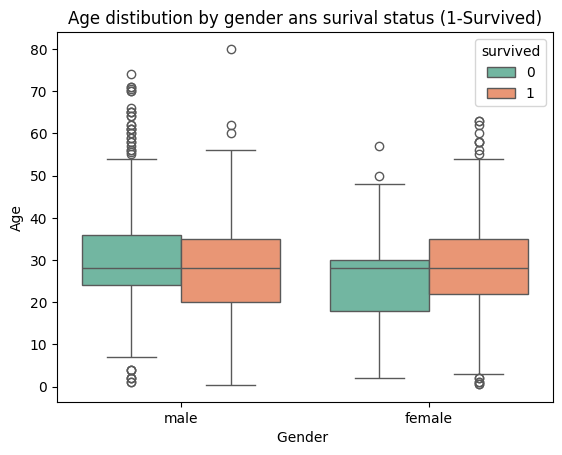

In [43]:
sns.boxplot(x='sex',y='age',hue='survived',data=data,palette='Set2')
plt.title('Age distibution by gender ans surival status (1-Survived)')
plt.xlabel('Gender ')
plt.ylabel('Age')
plt.show()


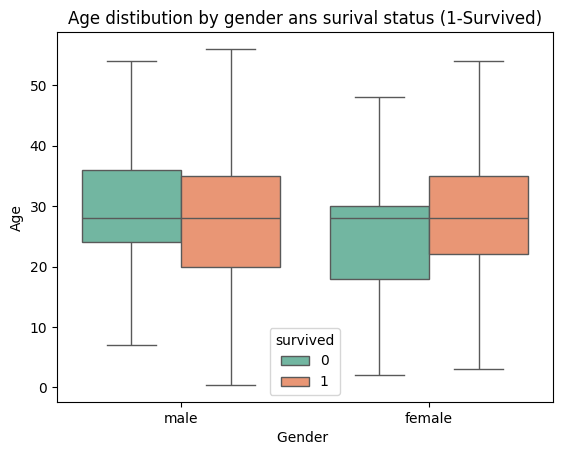

In [44]:
sns.boxplot(x='sex',y='age',hue='survived',data=data,palette='Set2',showfliers=False)
plt.title('Age distibution by gender ans surival status (1-Survived)')
plt.xlabel('Gender ')
plt.ylabel('Age')
plt.show()

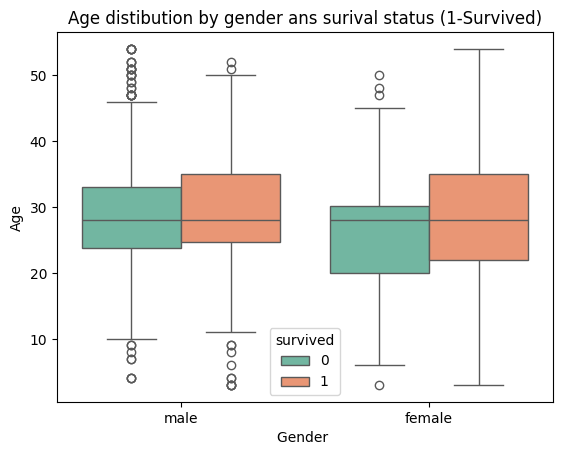

In [45]:
# remove outliers

q1=data['age'].quantile(0.25)
q3=data['age'].quantile(0.75)

IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

data_without_outliers=data[(data['age']>=lower_bound)&(data['age']<=upper_bound)]

sns.boxplot(x='sex',y='age',hue='survived',data=data_without_outliers,palette='Set2')
plt.title('Age distibution by gender ans surival status (1-Survived)')
plt.xlabel('Gender ')
plt.ylabel('Age')
plt.show()



C:\Users\Asus\AppData\Local\Temp\ipykernel_6516\3785615116.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_cols, group_keys=False).apply(filter_group)


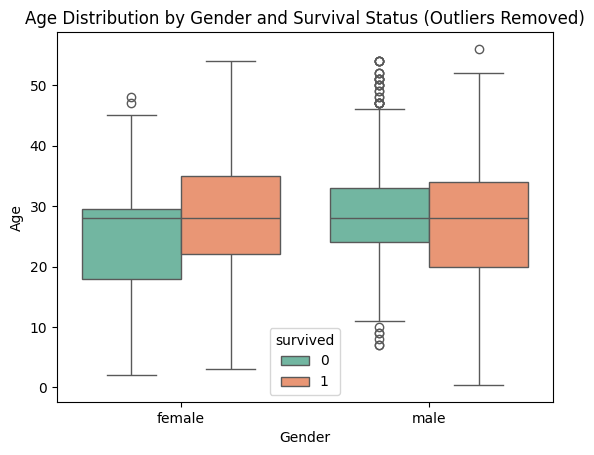

In [46]:
def remove_outliers_groupwise(df, group_cols, target_col):
    def filter_group(group):
        q1 = group[target_col].quantile(0.25)
        q3 = group[target_col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        return group[(group[target_col] >= lower) & (group[target_col] <= upper)]
    
    return df.groupby(group_cols, group_keys=False).apply(filter_group)

# Remove outliers for each group of 'sex' and 'survived'
cleaned_data = remove_outliers_groupwise(data, ['sex', 'survived'], 'age')

# Plot again
sns.boxplot(x='sex', y='age', hue='survived', data=cleaned_data, palette='Set2')
plt.title('Age Distribution by Gender and Survival Status (Outliers Removed)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()
